<strong>Kütüphanelerimizi okuduk.</strong>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

<h4><strong>EDA</strong><br>
<h5>Öncelikle verimizi okuduk ve data hakkında bazı bilgiler elde etmek istedik. Böylece datayı tanımaya çalıştık.</h5>

In [2]:
data = pd.read_csv('/kaggle/input/loan-pedictor-dtset/term-deposit-marketing-2020.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
print(len(data))
print("Data shape ", data.shape)
describe = data.describe()

40000
Data shape  (40000, 14)


<strong> Görülebileceği gibi dataset 14 sütun ve 40.000 veri noktası içeriyor.</strong>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [6]:
print(data.isnull().sum().sort_values(ascending=False))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


<strong>Hiçbir gözlemde eksik veri bulunmamaktadır. </strong>


<strong>Veri Görselleştirme ve Yorumlama</strong></h4>

<strong>Kategorik değişkenler olduğu için countplot daha uygun olur.
Title ile başlık eklenmiş x ve y eksenlerine ise ilgili kolonlar yerleştirilmiştir.<strong>

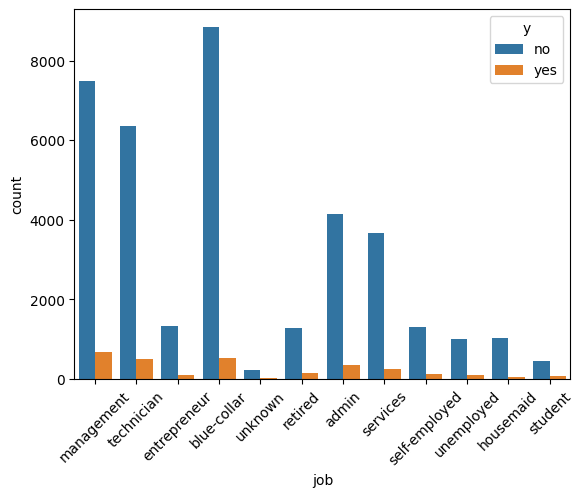

In [7]:

sns.countplot(data=data, x='job', hue='y')
plt.xticks(rotation=45)
plt.show()
##hangi meslek grubuna daha çok kredi verilmiş? sorusu için 


<strong>Daha çok management pozisyonundaki kişilere kredi veriliyorken bu oran öğrenci ve hizmet sektörü için oldukça düşük
düzenli geri ödeme kolaylığı işe bağlı olarak değiştiği için olabilir.</strong>

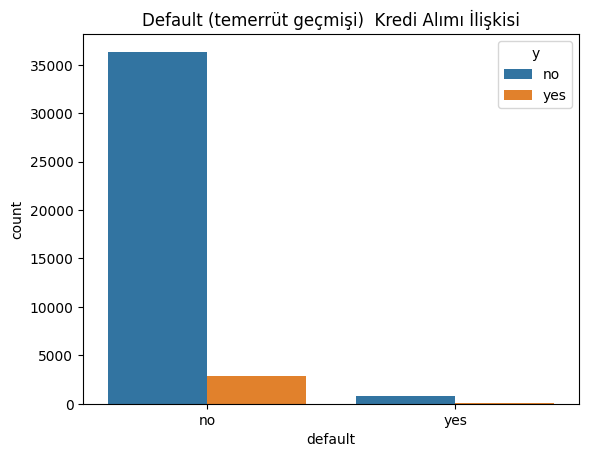

In [8]:

sns.countplot(x='default', hue='y', data=data)
plt.title('Default (temerrüt geçmişi)  Kredi Alımı İlişkisi')
plt.show()

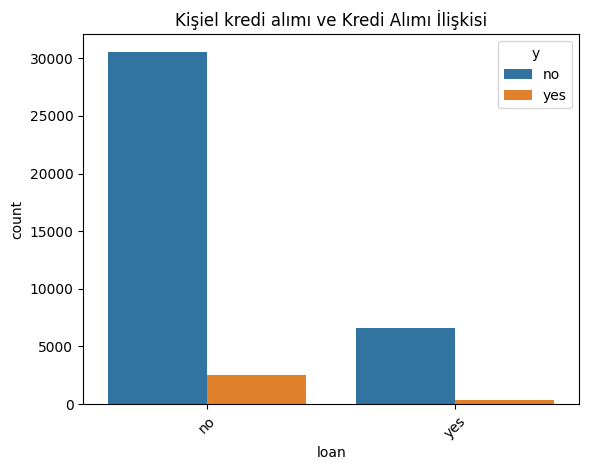

In [9]:
sns.countplot(data=data, x='loan', hue='y')
plt.title('Kişiel kredi alımı ve Kredi Alımı İlişkisi')
plt.xticks(rotation=45)
plt.show()

<strong>Kişisel kredi bulunmuyorken de kredi verilme oranı oldukça düşük. Farklı kolonlar daha etkili olabilir.</strong>

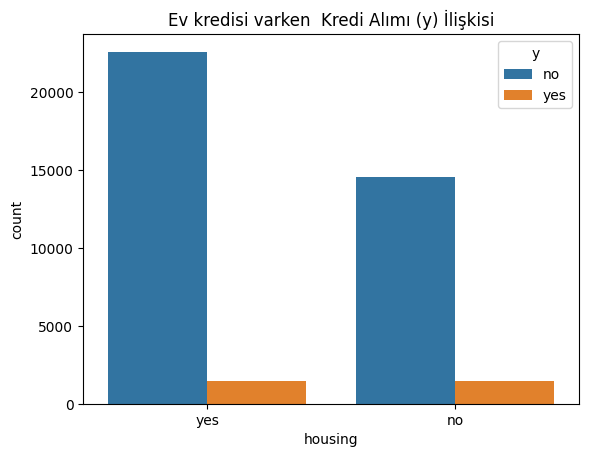

In [10]:
sns.countplot(x='housing', hue='y', data=data)
plt.title('Ev kredisi varken  Kredi Alımı (y) İlişkisi')
plt.show()

<strong>Ev kredisi olduğu zaman kredi verme oranı oldukça düşük bu sebeple 
Ev kredisi çok yüsek olabilir çünkü bu ödemenin geri alınmasının zor olduğu düşünülüyorsa kredi verilmiyordur.</strong>

<strong>Age sayısal değişken olduğu için histogram grafiği daha uygundur. Dağılım daha net gözükür.</strong>

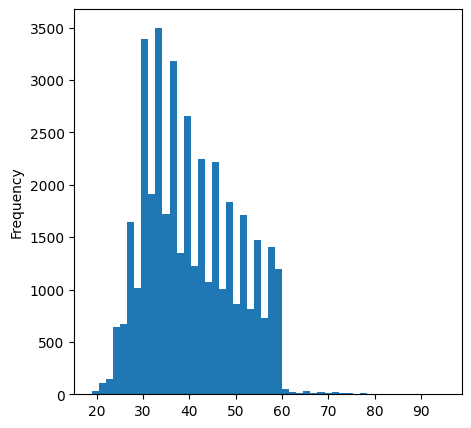

In [11]:
data.age.plot(kind = 'hist',bins = 50,figsize = (5,5))
plt.show()
#yaş ortalaması


<strong>Genelde orta yaş kredi başvurusu yapıyor yani bir meslek bir gelir edindikten sonra gibi duruyor.</strong>

<function matplotlib.pyplot.show(close=None, block=None)>

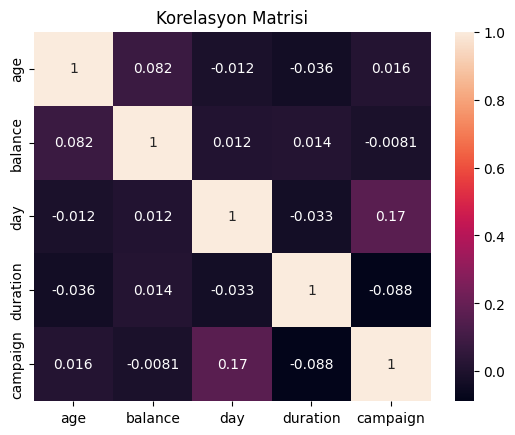

In [12]:
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True )
plt.title('Korelasyon Matrisi')
plt.show



<strong>Sayısal değişkenler arasındaki ilişkiyi daha net görmek için Korelasyon Matrisi çizilmiştir. Örneğin campaign ve day arasındaki oran duration ve day 
arasındaki orana göre yüksek çünkü son iletişim tarihi ve gün ilişkisinin daha yüksek olmasını bekleriz.</strong>

<strong> Genel olarak iyi bir meslek grubuda olmayan ve kredi oranı bulunan kişilere kredi verilmiyor.Hatta loan kolonunda "no" durumunda dahi kredi verilme oranı düşük.
Bunun sebebi seçiciliği arttırmak ve ödemeleri tam bir dönüş ile geri almak olabilir.</strong>

<strong>Makine öğrenmesi modelleri sayısal verilerle çalıştığı için, kategorik (object türündeki) değişkenler get_dummies() fonksiyonu ile one-hot encoding uygulanarak sayısal formata dönüştürülmüştür. Prefix ismi kolonun kendi ismi olarak verilmiştir.</strong>

In [13]:
data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'], prefix = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])
data.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,no,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,44,29,5,151,1,no,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,33,2,5,76,1,no,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,47,1506,5,92,1,no,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,33,1,5,198,1,no,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<strong>get_dummies() ile True ve False kolonları oldu bu sebeple okunurluğu kolaylaştırmak içinde ilgi değerler int olarak gösterildi. </strong>

In [14]:
dumm_cols = data.select_dtypes(include='bool').columns

# Bu sütunları int'e çevir (True→1, False→0)
data[dumm_cols] = data[dumm_cols].astype(int)

In [15]:
data.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,no,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,no,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,no,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,no,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,no,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<strong>Hedef kolonumuzu dataframeden ayırdık. Artık bir tahmin kolonu oldu."yes" ve "no"
değerler için de eğer "yes" ise 1 değilse "0" sayısal değerleri belirlendi.</strong>

In [16]:
data = data.rename(columns = {"y":"target"})
data["target"] = [1 if i.strip() == "yes" else 0 for i in data.target]

<strong> DataFrame'den hedef kolonu çıkarıldı.</strong>

In [17]:
y = data.target
x = data.drop(["target"],axis = 1) 

<strong>Tahmin edilmesi gerekilen değer y değeriydi. Değeri 1 ve 0 olarak değiştirdim çünkü model 1 ve 0 ile çalışır.
Kredi verilecekse 1 verilmeyecekse 0.</strong>



<h4>MODEL </br>
    Bu noktaya kadar veriye ön işleme adımları uygulanarak model için hazır hale getirildi. Artık  modelin eğitilmesi aşamasına geçiyoruz<h4>

In [18]:
test_size = 0.2
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = test_size, random_state = 42,stratify=y)

<strong>Dataset dengesiz bir dataset olduğu için train_test_split fonksiyonun "stratify" parametresi kullanılmıştır.Veri setinin %20'si test verisi, kalan %80'i ise eğitim (train) verisi olarak ayrılır.

</strong>

<strong>KNN algoritması ile birlikte MinMaxScaler  kullandım çünkü dataset üzerinde bir değerin diğer değere daha baskın gelmesini ve o değeri ezmesini istemedim.  </br>
Son durum; 
KNN + MinMaxScaler  </strong>

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<strong> KNN algoritması seçildi çünkü iyi bir sınıfalandırma algoritmasıdır ayrıca tahmin yapmak istediğimiz durumda doğrusal bir durum değildir.Aynı zamanda hiperparametre optimizasyonu ile modelin performansı arttırmayı hedefledim.</strong>

In [20]:
model = KNeighborsClassifier()
##model oluşturuldu.

In [21]:
parameters = {
    
    'n_neighbors':[3,5,10,15],
 'weights': ['uniform', 'distance'],}
    

<strong>Değerleri tamamiyle kendim verdim çok büyük ve birbirinden çok uzak değerler olmamasına dikkat ettim. 'Weights' parametresinde ise araştırmalarım doğrultusunda yaygın olarak tercih edilen seçenekleri kullandım.</strong>

In [22]:
cv = StratifiedKFold(n_splits=5)  

<strong>Datasette 5 katlı çapraz doğrulama (cross-validation) yapılması için StratifiedKFold kullanılmıştır.</strong>

In [23]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
   
)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

**Estimator zaten modelimiz bizim için KNN, param_grid seçtiğimiz değerler, score içinde accuracy değeri belirlendi ben doğruluk değerini görmek istedim ve model fit edildi yani eğitildi.**

<strong></strong>

In [24]:
print("En iyi parametreler:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

En iyi parametreler: {'n_neighbors': 10, 'weights': 'uniform'}
Accuracy: 0.9279375


<strong>GridSearchCV kullanılarak en uygun hiperparametreler best_params_ özelliği ile tespit edildi.</strong>

In [25]:
best_parm_knn = grid_search.best_estimator_ # en iyi parametreer ile eğitilmiş model


accuracy_test = best_parm_knn.score(X_test, Y_test)
print("Test Accuracy:", accuracy_test)  ##test verisindeki doğruluk

Test Accuracy: 0.9285


In [26]:

y_pred = grid_search.best_estimator_.predict(X_test)
#test seti üzerindeki sonuçlar


<strong>Sonuçlara baktığımızda;
</br>
0 classı için neredeyse hiç kaçırmıyor yani güzel tahminnler yapıyor ancak </br>
1 classı için aynı şeyi söylemek pek mümkün değil.
Datasetimizin dengesiz bir dataset olması da bu durumu etkiliyor.</strong>

In [27]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7421
           1       0.55      0.06      0.11       579

    accuracy                           0.93      8000
   macro avg       0.74      0.53      0.54      8000
weighted avg       0.90      0.93      0.90      8000



**Modelin test verisi üzerindeki performansını değerlendirmek için classification_report fonksiyonu kullanıldı. Bu fonksiyon sayesinde precision, recall, f1-score ve accuracy gibi önemli metrikleri detaylı şekilde gözlemlenir.**

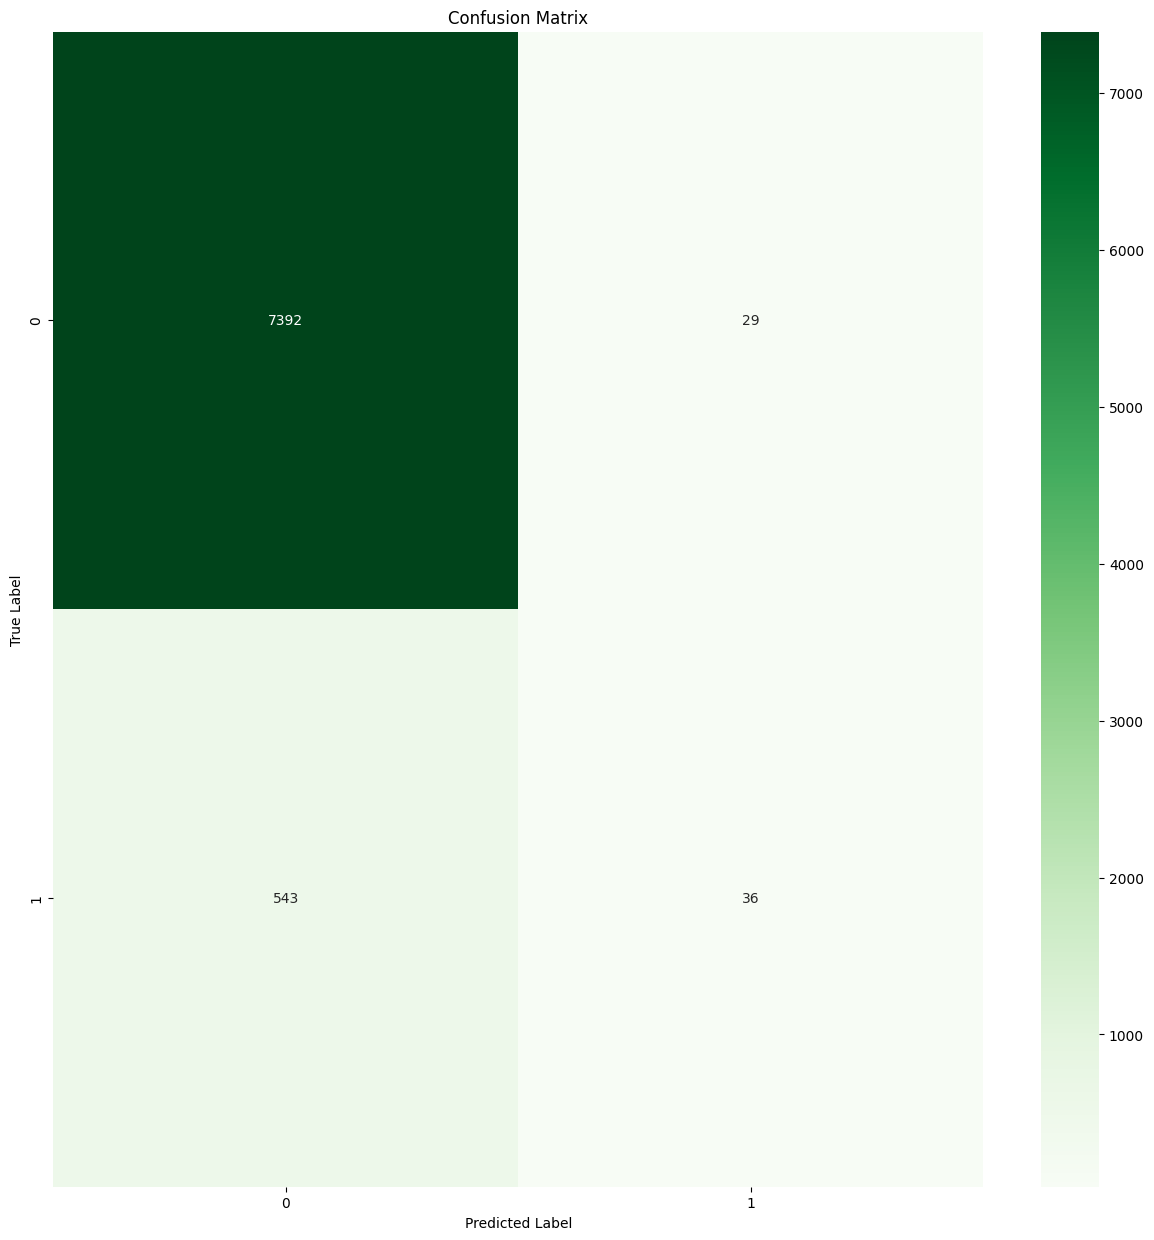

In [28]:
confusion_mtx = confusion_matrix(Y_test, y_pred) 
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_mtx, annot=True, cmap="Greens",linecolor="gray", fmt= 'd',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Son olarak confusion_matrix hesaplandı ve görselleştirildi.
Burada modelin 0 classı için daha başarılı olduğunu net bir şekilde söylebiliriz. 
gerçek değer 0 iken 0 tahmin ettiği 7392 ancak gerçek değer 1 iken 1 tahmin ettiği 36. Oldukça düşük bir oran.1 classı için model başarısız denebilir.**